### Exercicio 1

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import optimizers
import numpy as np
from time import time

# Carregar os dados MNIST
(AX, AY), (QX, QY) = mnist.load_data()

# Filtrar somente os dígitos 5 e 6
labels_to_filter = [5, 6]
indices_to_keep_train = np.where(np.isin(AY, labels_to_filter))[0]
indices_to_keep_test = np.where(np.isin(QY, labels_to_filter))[0]
AX = AX[indices_to_keep_train]
AY = AY[indices_to_keep_train]
QX = QX[indices_to_keep_test]
QY = QY[indices_to_keep_test]

nclasses = 2  # Número de classes (5 e 6)
AY2 = keras.utils.to_categorical(AY - 5, nclasses)  # Rotular 5 como 0 e 6 como 1
QY2 = keras.utils.to_categorical(QY - 5, nclasses)

nl, nc = AX.shape[1], AX.shape[2]
AX = (AX.astype('float32') / 255.0) - 0.5
QX = (QX.astype('float32') / 255.0) - 0.5
AX = np.expand_dims(AX, axis=3)
QX = np.expand_dims(QX, axis=3)

model = Sequential()
model.add(Conv2D(20, kernel_size=(5, 5), activation='relu', input_shape=(nl, nc, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(40, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(nclasses, activation='softmax'))

opt = optimizers.Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

t0 = time()
model.fit(AX, AY2, batch_size=100, epochs=30, verbose=2)
t1 = time()
print("Tempo de treino: %.2f s" % (t1 - t0))

score = model.evaluate(QX, QY2, verbose=False)
print('Test loss: %.4f' % (score[0]))
print('Test accuracy: %.2f %%' % (100 * score[1]))
print('Test error: %.2f %%' % (100 * (1 - score[1])))

t2 = time()
QP2 = model.predict(QX)
QP = np.argmax(QP2, axis=1) + 5  # Converter 0 para 5 e 1 para 6
t3 = time()
print("Tempo de predicao: %.2f s" % (t3 - t2))
nerro = np.count_nonzero(QP - QY)
print("Número de erros: %d" % nerro)

model.save('cnn_digit_5_6.h5')

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/30
114/114 - 11s - loss: 0.0730 - accuracy: 0.9744 - 11s/epoch - 100ms/step
Epoch 2/30
114/114 - 0s - loss: 0.0141 - accuracy: 0.9951 - 381ms/epoch - 3ms/step
Epoch 3/30
114/114 - 0s - loss: 0.0087 - accuracy: 0.9974 - 369ms/epoch - 3ms/step
Epoch 4/30
114/114 - 0s - loss: 0.0066 - accuracy: 0.9979 - 385ms/epoch - 3ms/step
Epoch 5/30
114/114 - 0s - loss: 0.0042 - accuracy: 0.9988 - 370ms/epoch - 3ms/step
Epoch 6/30
114/114 - 0s - loss: 0.0036 - accuracy: 0.9988 - 374ms/epoch - 3ms/step
Epoch 7/30
114/114 - 0s - loss: 0.0034 - accuracy: 0.9989 - 379ms/epoch - 3ms/step
Epoch 8/30
114/114 - 0s - loss: 0.0041 - accuracy: 0.9981 - 385ms/epoch - 3ms/step
Epoch 9/30
114/114 - 0s - loss: 6.2661e-04 - accuracy: 0.9999 - 382ms/epoch - 3ms/step
Epoch 10/30
114/114 - 0s - loss: 3.3918e-04 - accuracy: 1.0000 - 391ms/epoch - 3ms/step
Epoch 11/30
114/114 - 0s - loss: 9.8952e-05 - accuracy: 1.0000 - 378ms/epoch - 3ms/step
Epoch 1

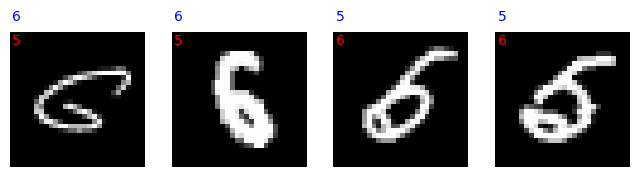

In [ ]:
import matplotlib.pyplot as plt

# Encontrar índices dos exemplos classificados incorretamente
incorrect_indices = np.where(QP != QY)[0]

# Selecionar exemplos classificados incorretamente
QEX_incorrect = QX[incorrect_indices]
QEY_incorrect = QY[incorrect_indices]
QEP_incorrect = QP[incorrect_indices]

# Plot dos exemplos classificados incorretamente
num_errors = len(incorrect_indices)
f = plt.figure(figsize=(num_errors * 2, 2))
for i in range(num_errors):
    f.add_subplot(1, num_errors, i+1)
    plt.imshow(QEX_incorrect[i, :, :, 0], cmap="gray")
    plt.axis("off")
    plt.text(0, -3, str(QEY_incorrect[i]), color="b")
    plt.text(0, 2, str(QEP_incorrect[i]), color="r")

plt.savefig("incorrect_predictions.png")
plt.show()


Exercicio 2

In [ ]:
import tensorflow as tf

# Definir os valores das variáveis
w1 = -0.2
w2 = 0.5
w3 = 0.9
w4 = -0.6
w5 = 0.2
w6 = -0.4
b1 = 0.4
b2 = -0.2
b3 = -0.5
i1 = 0.6
i2 = -0.3
y = 1.0

# Definir as variáveis treináveis
w1 = tf.Variable(w1)
w2 = tf.Variable(w2)
w3 = tf.Variable(w3)
w4 = tf.Variable(w4)
w5 = tf.Variable(w5)
w6 = tf.Variable(w6)
b1 = tf.Variable(b1)
b2 = tf.Variable(b2)
b3 = tf.Variable(b3)

# Definir os cálculos da rede neural
with tf.GradientTape(persistent=True) as tape:
    z1 = w1 * i1 + w2 * i2 + b1
    p1 = tf.math.sigmoid(z1)
    z2 = w3 * i1 + w4 * i2 + b2
    p2 = tf.math.sigmoid(z2)
    z3 = w5 * p1 + w6 * p2 + b3
    c = (z3 - y) ** 2

# Calcular as derivadas parciais
dcdw1, dcdw2, dcdw3, dcdw4, dcdw5, dcdw6 = tape.gradient(c, [w1, w2, w3, w4, w5, w6])
dcdb1, dcdb2, dcdb3 = tape.gradient(c, [b1, b2, b3])

# Imprimir as derivadas parciais
print("dcdw1:", dcdw1.numpy())
print("dcdw2:", dcdw2.numpy())
print("dcdw3:", dcdw3.numpy())
print("dcdw4:", dcdw4.numpy())
print("dcdw5:", dcdw5.numpy())
print("dcdw6:", dcdw6.numpy())
print("dcdb1:", dcdb1.numpy())
print("dcdb2:", dcdb2.numpy())
print("dcdb3:", dcdb3.numpy())

# Limpar o contexto do GradientTape
del tape

dcdw1: -0.09824643
dcdw2: 0.049123216
dcdw3: 0.184564
dcdw4: -0.092282
dcdw5: -1.751102
dcdw6: -2.0625236
dcdb1: -0.16374405
dcdb2: 0.30760664
dcdb3: -3.2887366
